In [1]:
import os
# os.chdir("../")

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Using Gene2Vec-pretrained + GIT-finetuned gene embeddings to get a feature representation of each sample

In [3]:
git_data_dir = "./Dataset/git_data/data/"
# gene_emb_dir = "./Dataset/git_data/data/gene_emb_finetune.npy"
gene_emb_matrix = np.load(git_data_dir + "gene_emb_finetune.npy")
gene_emb_matrix.shape

(19782, 512)

In [4]:
with open(git_data_dir + "idx2gene.txt", "r") as f:
    idx2gene_raw = [line.strip() for line in f.readlines()]  # Index to gene name mapping

In [5]:
idx2gene = {}

for text in idx2gene_raw:
    colon_index = text.find(':')
    idx = int(text[:colon_index])
    gene = text[colon_index+2:]
    idx2gene[idx] = gene

gene2idx = {}
for idx, gene in idx2gene.items():
    gene2idx[gene] = idx


In [6]:
mutations_df = pd.read_csv('Dataset/mydata/chol_tcga_pan_can_atlas_2018/mutations_summary.csv')
mutations_df.head()

,Tumor_Sample_Barcode,Mutation_Count,Mutations
0,TCGA-3X-AAV9-01,75,"TRUB1, ASCC1, RRM1, MAP3K11, LMO3, ABCC9, ANKR..."
1,TCGA-3X-AAVA-01,60,"ASAH2, ROBO4, ARFGAP2, TMEM132C, KRT3, DCLK1, ..."
2,TCGA-3X-AAVB-01,48,"WDFY4, A1CF, RAN, KRAS, STAT6, TUBGCP3, ISLR2,..."
3,TCGA-3X-AAVC-01,84,"BEND7, MUC6, ANO3, TSPAN18, UBE2L6, OR9I1, OR1..."
4,TCGA-3X-AAVE-01,68,"NET1, BIRC2, OR5D16, POC1B, ASB7, EXD1, ALPK3,..."


In [7]:
mutations_df

,Tumor_Sample_Barcode,Mutation_Count,Mutations
0,TCGA-3X-AAV9-01,75,"TRUB1, ASCC1, RRM1, MAP3K11, LMO3, ABCC9, ANKR..."
1,TCGA-3X-AAVA-01,60,"ASAH2, ROBO4, ARFGAP2, TMEM132C, KRT3, DCLK1, ..."
2,TCGA-3X-AAVB-01,48,"WDFY4, A1CF, RAN, KRAS, STAT6, TUBGCP3, ISLR2,..."
3,TCGA-3X-AAVC-01,84,"BEND7, MUC6, ANO3, TSPAN18, UBE2L6, OR9I1, OR1..."
4,TCGA-3X-AAVE-01,68,"NET1, BIRC2, OR5D16, POC1B, ASB7, EXD1, ALPK3,..."
5,TCGA-4G-AAZO-01,69,"COX15, GBF1, SORBS1, IL10RA, PAX6, OR5I1, CD16..."
6,TCGA-4G-AAZT-01,147,"DPYSL4, NLRX1, ARFGAP2, STAB2, LRP1, ZDHHC17, ..."
7,TCGA-W5-AA2G-01,80,"CUBN, ANK3, AGAP5, TSSC4, KCNK4, ZFC3H1, NR2C1..."
8,TCGA-W5-AA2H-01,12,"EP400, TMEM87A, NDEL1, ZNF683, IFT172, NIPBL, ..."
9,TCGA-W5-AA2I-01,139,"PHYH, FEZ1, MUC5B, MUC5B, CD81, TAS2R31, GALNT..."


In [8]:
def get_embedding_for_gene(gene):
    """Given gene returns embedding representation of the gene"""
    if gene in gene2idx.keys():
        idx = gene2idx[gene]
        return gene_emb_matrix[idx]
    else:
        print(f"Embedding for gene {gene} not found")
        return None


In [9]:
def compute_sample_embedding(mutated_genes_str):
    mutated_genes = mutated_genes_str.split(', ')
    embeddings = [get_embedding_for_gene(gene) for gene in mutated_genes]
    embeddings = [emb for emb in embeddings if emb is not None]  
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return None


In [10]:
mutations_df["Mutations_Emb"] = mutations_df['Mutations'].apply(compute_sample_embedding)
mutations_df.head()

Embedding for gene PRR22 not found
Embedding for gene CENPU not found
Embedding for gene PDP1 not found
Embedding for gene RP11-262H14.1 not found
Embedding for gene hsa-mir-3171 not found
Embedding for gene IGLV3-1 not found
Embedding for gene TSPAN14 not found
Embedding for gene CKS1B not found
Embedding for gene TSPEAR-AS1 not found
Embedding for gene SEPT6 not found
Embedding for gene UBE2L6 not found
Embedding for gene MT1X not found
Embedding for gene IFNL3 not found
Embedding for gene MLK7-AS1 not found
Embedding for gene HAAO not found
Embedding for gene RFESD not found
Embedding for gene ZNF250 not found
Embedding for gene FGF16 not found
Embedding for gene MARCH6 not found
Embedding for gene PSMA5 not found
Embedding for gene PEX11B not found
Embedding for gene BRINP3 not found
Embedding for gene HMGCL not found
Embedding for gene NRROS not found
Embedding for gene FAXDC2 not found
Embedding for gene C6orf164 not found
Embedding for gene ZNF703 not found
Embedding for gene AK

,Tumor_Sample_Barcode,Mutation_Count,Mutations,Mutations_Emb
0,TCGA-3X-AAV9-01,75,"TRUB1, ASCC1, RRM1, MAP3K11, LMO3, ABCC9, ANKR...","[-0.0008926436, -0.0019045401, -0.003271448, -..."
1,TCGA-3X-AAVA-01,60,"ASAH2, ROBO4, ARFGAP2, TMEM132C, KRT3, DCLK1, ...","[-0.0016526305, -0.0014417192, -0.0048769545, ..."
2,TCGA-3X-AAVB-01,48,"WDFY4, A1CF, RAN, KRAS, STAT6, TUBGCP3, ISLR2,...","[-0.0011600053, -0.0021739616, -7.325825e-05, ..."
3,TCGA-3X-AAVC-01,84,"BEND7, MUC6, ANO3, TSPAN18, UBE2L6, OR9I1, OR1...","[-0.00011402202, 0.0009373962, -0.004728923, 0..."
4,TCGA-3X-AAVE-01,68,"NET1, BIRC2, OR5D16, POC1B, ASB7, EXD1, ALPK3,...","[-0.0020724072, -0.0016966736, -0.006675206, -..."


### Applying PCA over Mutations Emb

In [15]:
mutations_df[['Tumor_Sample_Barcode', 'Mutations_Emb']].head()

,Tumor_Sample_Barcode,Mutations_Emb
0,TCGA-3X-AAV9-01,"[-0.0008926436, -0.0019045401, -0.003271448, -..."
1,TCGA-3X-AAVA-01,"[-0.0016526305, -0.0014417192, -0.0048769545, ..."
2,TCGA-3X-AAVB-01,"[-0.0011600053, -0.0021739616, -7.325825e-05, ..."
3,TCGA-3X-AAVC-01,"[-0.00011402202, 0.0009373962, -0.004728923, 0..."
4,TCGA-3X-AAVE-01,"[-0.0020724072, -0.0016966736, -0.006675206, -..."


In [21]:
embeddings = np.array(mutations_df["Mutations_Emb"].to_list())

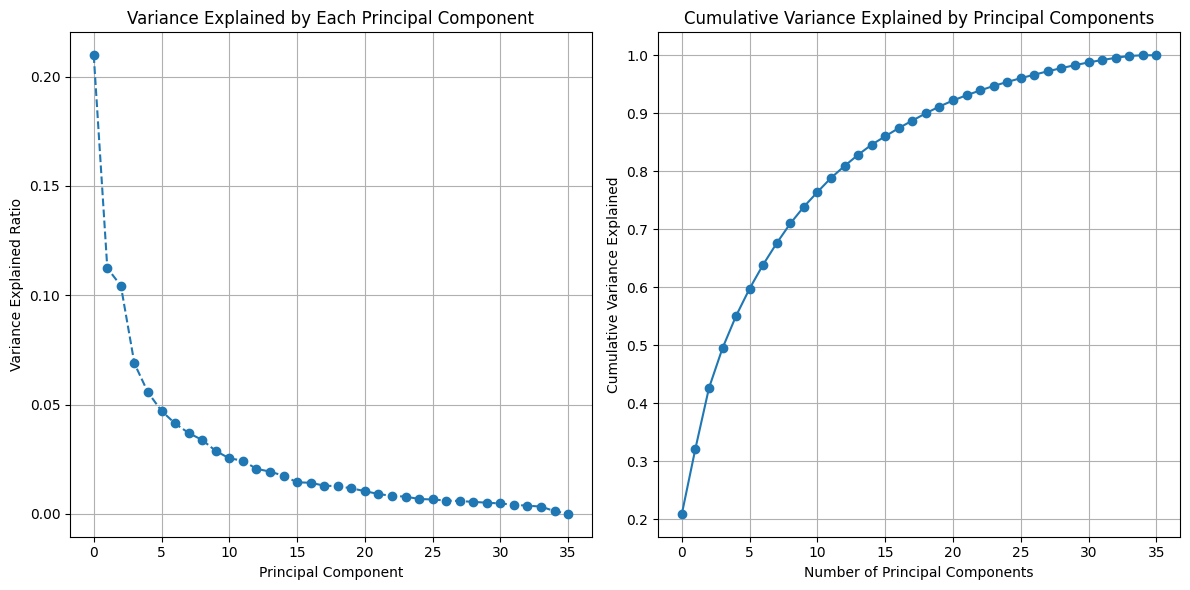

In [30]:
# Standardize the embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Perform PCA
pca = PCA()
pca.fit(embeddings_scaled)

# Plot variance explained by each principal component
plt.figure(figsize=(12, 6))

# Plot explained variance ratio of each principal component
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)

# Plot cumulative variance explained
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)

plt.tight_layout()
plt.show()

Using 10 PCs, since there is no clear elbow and almost 75% variance is explained by 10 PCs

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.20981865, 0.32224062, 0.42662033, 0.49540123, 0.55095017,
       0.5980278 , 0.6393543 , 0.67632484, 0.7101116 , 0.7388818 ,
       0.7642642 , 0.7885769 , 0.8091585 , 0.8284721 , 0.84589124,
       0.8603026 , 0.8745028 , 0.8873786 , 0.9000176 , 0.911683  ,
       0.9220499 , 0.9311094 , 0.9392976 , 0.9471677 , 0.95394814,
       0.9604936 , 0.9665491 , 0.9724175 , 0.97786266, 0.9829495 ,
       0.9876699 , 0.9917868 , 0.9954957 , 0.9987984 , 1.        ,
       1.        ], dtype=float32)

In [39]:
n_components = 10
principal_components = pca.transform(embeddings_scaled)

first_10_pcs = principal_components[:, :n_components]
print("Shape of first 10 principal components:", first_10_pcs.shape)

storage_dir = "./Dataset/mydata/chol_tcga_pan_can_atlas_2018/"
np.save(storage_dir + 'mutations_first_10_pcs.npy', first_10_pcs)

Shape of first 10 principal components: (36, 10)


In [44]:
principal_components = pca.transform(embeddings_scaled)

print("Shape of full principal components matrix:", principal_components.shape)

storage_dir = "Dataset/mydata/chol_tcga_pan_can_atlas_2018/"
np.save(storage_dir + 'mutations_pcs.npy', principal_components)

Shape of full principal components matrix: (36, 36)
